In [17]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [18]:
data= pd.read_csv("C:\\Users\\Rida\\Downloads\\df_normalized_pos.csv")
data.head()

,day_of_week,scheduled_time,block,is_layover,Temperature,Target,direction_id,stop_sequence,geo_nodes,minimum_clearance,segment_length,hausdorff_distance,station_n,stop_order_n,vehicle_num_n,route_n,x_start,x_end,y_start,y_end
0,7,43680,7,1,28.0,1,1.0,48.0,7.0,0.000160,0.003806,0.001549,35,264,13,45,0.594825,0.594057,0.381787,0.383844
1,7,58800,4,1,34.0,1,1.0,67.0,8.0,0.000048,0.002493,0.001169,3,63,5,44,0.608235,0.608011,0.365812,0.367187
2,2,54000,2,1,63.0,1,1.0,39.0,13.0,0.000291,0.010379,0.002455,14,578,117,49,0.680762,0.680995,0.386218,0.389967
3,3,28800,2,0,52.0,1,1.0,45.0,10.0,0.000062,0.005435,0.001891,0,187,131,42,0.651421,0.652200,0.303161,0.305325
4,4,83400,1,1,48.0,1,1.0,50.0,10.0,0.000020,0.002341,0.001007,3,1140,369,26,0.608265,0.608197,0.365392,0.366801


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Understanding the relationship between all independent attribute:
We will be using data correlation:

Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

One or multiple attributes depend on another attribute or a cause for another attribute.
One or multiple attributes are associated with other attributes.
Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

<AxesSubplot:>

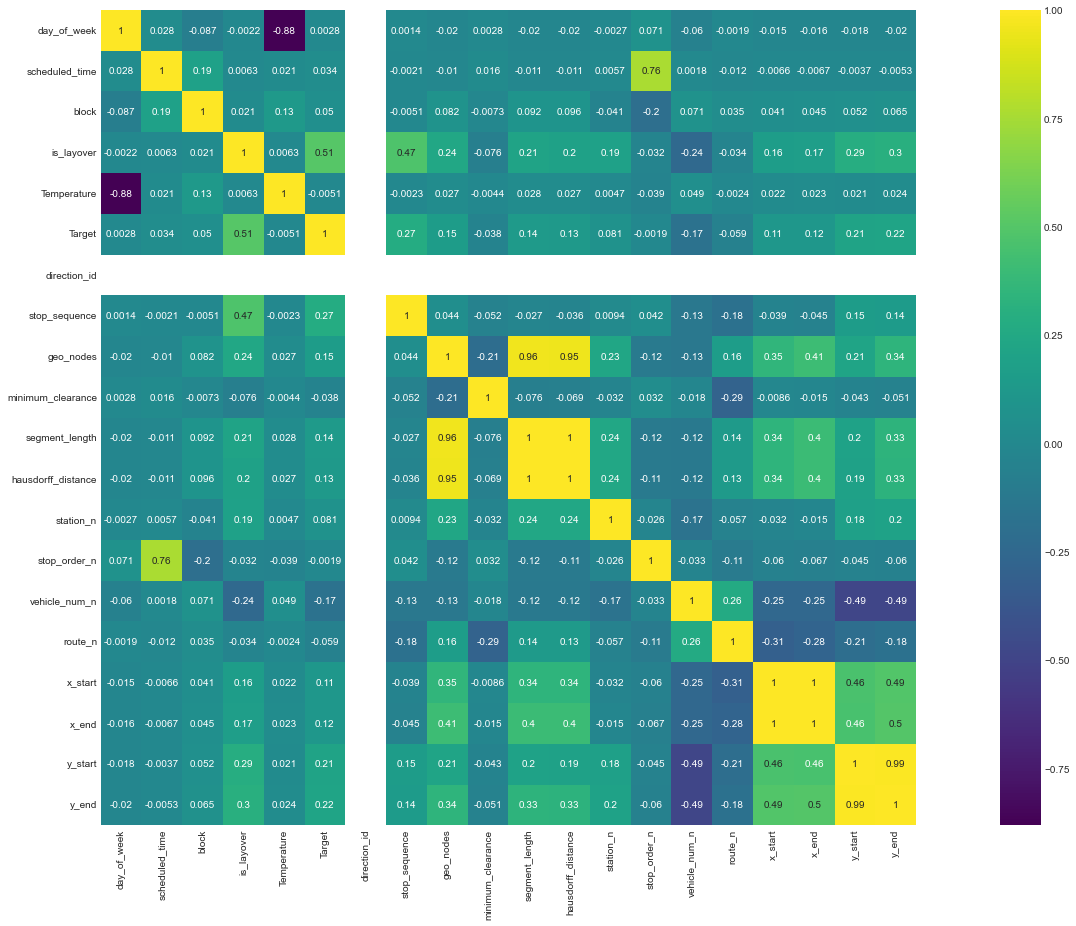

In [36]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), vmax=1,square=True,annot=True,cmap='viridis')

In [37]:
# collecting those columns whose correlation is more than +-0.9

import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any((upper[column] >= 0.9))]

to_drop

['segment_length', 'hausdorff_distance', 'x_end', 'y_end']

In [ ]:
#lets pply PCA for dimensionality Reduction

<AxesSubplot:>

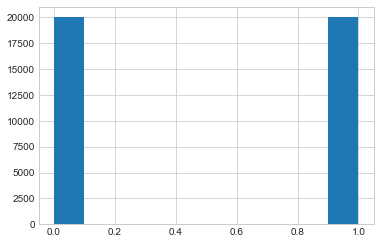

In [38]:
data["Target"].value_counts()
data["Target"].hist()

In [132]:
X = data.drop(["Target","direction_id"],axis=1)
y =data.Target

In [133]:
#Lets use PCA Technique:
import numpy as np
cov_matrix = data.drop(["Target","direction_id"],axis=1).cov()

In [134]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
  


In [135]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()

eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[371557639.8333527, 49758.540611541495, 16720.906374367973, 377.3643373493564, 280.09125932246974, 275.283670418189, 171.14428785037143, 105.02791865029269, 3.4754357098947963, 0.7600811742373127, 0.1568707726117898, 0.007506247564280671, 0.0022526913113339437, 4.148863875651016e-05, 1.5326432834282657e-06, 1.699761484887118e-07, 1.1174815469559606e-07, 4.117520893147507e-08]


In [136]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
#to check the amount of variance explained by each feature
cum_var_exp = np.cumsum(var_explained)

In [120]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing into 4 columns from 18

X_std_8D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

,0,1,2,3,4,5,6,7
0,-43679.518714,335.154524,3.055671,5.579967,66.682937,-24.975493,24.163678,15.743056
1,-58795.347056,742.135918,29.976569,-10.755470,76.998794,9.994220,28.577527,11.358655
2,-54002.852862,167.816087,-109.519151,11.686423,60.778591,-10.960989,60.792957,4.686319
3,-28799.861370,213.969698,-121.561596,1.214560,59.667967,3.234516,49.877807,3.255028
4,-83407.795582,19.911072,-367.209660,-20.859975,56.657454,-7.375574,44.249255,-2.886700
...,...,...,...,...,...,...,...,...
39995,-31318.938550,293.195331,2.384102,26.682805,68.720182,-41.144005,31.639405,23.103107
39996,-28799.739815,229.410373,-263.287707,-7.975976,45.912631,-11.687427,28.338482,4.268580
39997,-34020.154942,236.584236,-302.322192,-29.667480,50.390896,-5.016623,48.158366,-2.343394
39998,-73985.445909,124.888870,-309.905319,12.911299,68.746556,-45.577445,37.589139,15.024367


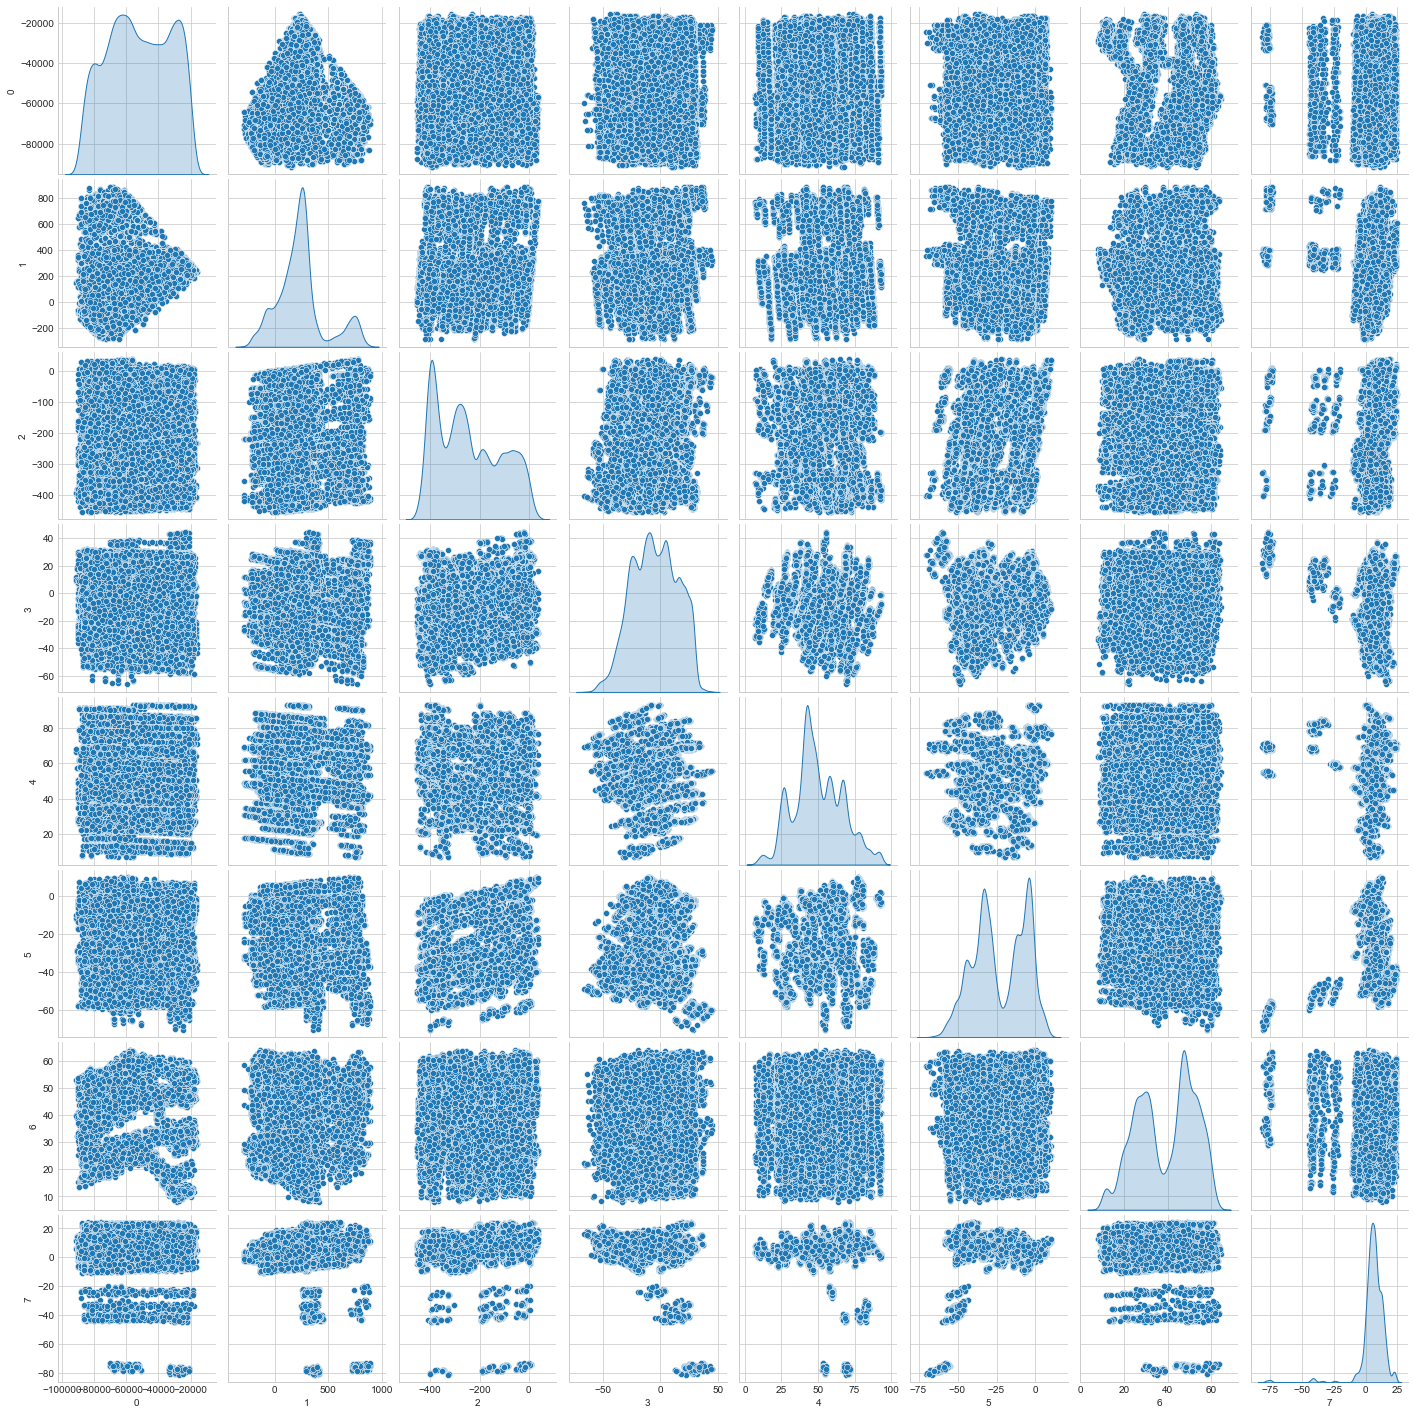

In [96]:
sns.pairplot(reduced_pca, diag_kind='kde') 

In [121]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

In [122]:
#now fit the model on pca data with new dimension1
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN() #instantiate the object
knn.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = knn.predict(pca_X_test)


print(accuracy_score(pca_y_predict,pca_y_test))

0.72825


In [123]:
target_names = ['not-delayed', 'delayed']
print(classification_report(pca_y_test, pca_y_predict, target_names=target_names))

              precision    recall  f1-score   support

 not-delayed       0.72      0.74      0.73      5986
     delayed       0.73      0.72      0.73      6014

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



In [124]:

mean_acc = np.zeros(20)

#Creating an array that contains accuracy scores for 1 to 20 neighbors
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(pca_X_train,pca_y_train)
    yhat= knn.predict(pca_X_test)
    mean_acc[i-1] = accuracy_score(pca_y_test, yhat)
    
#accuracy array
mean_acc

array([0.83475   , 0.7705    , 0.74541667, 0.7315    , 0.72825   ,
       0.71316667, 0.70883333, 0.695     , 0.68775   , 0.6775    ,
       0.67425   , 0.66791667, 0.66508333, 0.65875   , 0.65608333,
       0.65375   , 0.64758333, 0.645     , 0.63875   , 0.63708333])

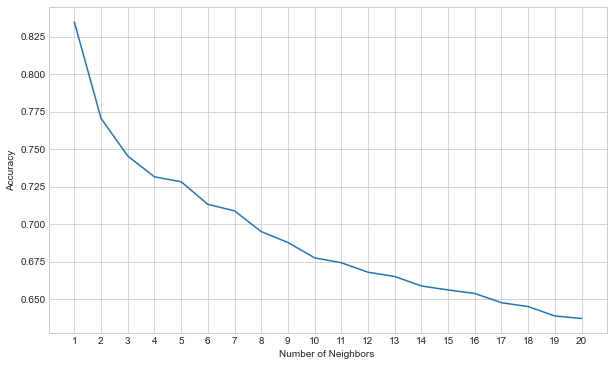

In [125]:
#plot
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [126]:
# your code
from sklearn.model_selection import GridSearchCV
knn_params ={
    "n_neighbors":[3,5,7],
    "weights" : ["uniform","distance"],
    "metric" : ["euclidean", "manhattan", "minkowski"],
    
}

knn = KNeighborsClassifier()

#grid search

gs = GridSearchCV(KNeighborsClassifier(), knn_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(pca_X_train, pca_y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [127]:
#Retrieving the best parameters
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [128]:
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(pca_X_train, pca_y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3,
                     weights='distance')

In [129]:
# getting a prediction
y_hat = knn.predict(pca_X_train)
y_pred = knn.predict(pca_X_test)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(pca_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5986
           1       0.84      0.83      0.83      6014

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



In [ ]:
#Hence we get a score of 84% after PCA and Hyperparameter tuning.